### Model Development

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Creating a Linear Regression and Train the Model

In [7]:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
lm.fit(df[['highway-mpg']], df[['price']])
lm

LinearRegression()

In [11]:
yhat = lm.predict(df[['highway-mpg']])
yhat[0:5] #Predicted price using SLR model

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [12]:
print(lm.coef_)
print(lm.intercept_)

[[-821.73337832]]
[38423.30585816]


### Creating MultiLinear Regression Model and Train the Mdoel

In [17]:
variables = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
mlr = LinearRegression()
mlr.fit(variables, df[['price']])
print(mlr.coef_)
print(mlr.intercept_)

[[53.49574423  4.70770099 81.53026382 36.05748882]]
[-15806.62462633]


In [26]:
yhatmlr = mlr.predict(variables)[0:5] #Predicted Values of Price using MLR Regression
yhatmlr[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

### Visualizing SLR Model

In [33]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

<Axes: xlabel='highway-mpg', ylabel='price'>

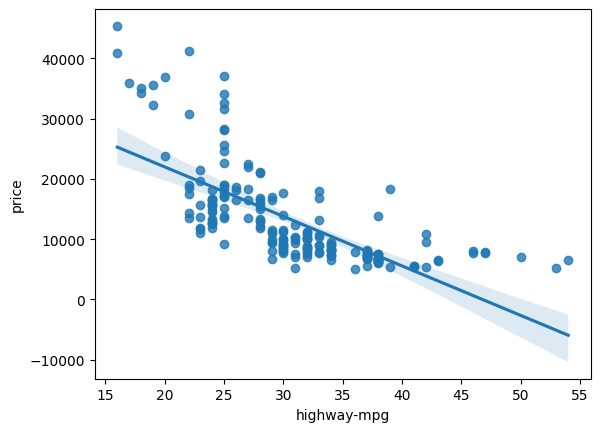

In [23]:
sns.regplot(x='highway-mpg', y="price", data=df)

<Axes: xlabel='highway-mpg', ylabel='price'>

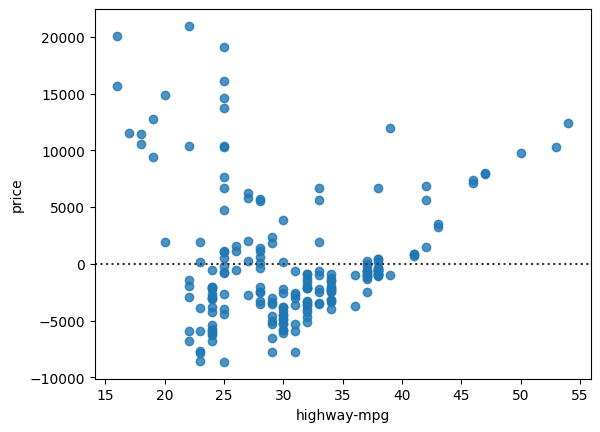

In [24]:
sns.residplot(x="highway-mpg", y="price", data=df)

### Visualizing MLR Mdoel

<Axes: xlabel='price', ylabel='Density'>

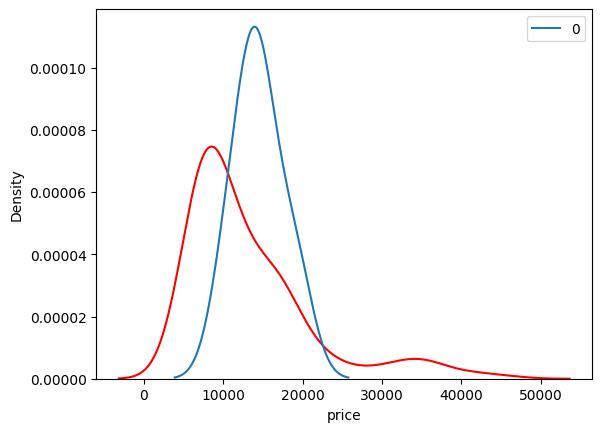

In [42]:
ax1 = sns.kdeplot(df['price'], color='r')
sns.kdeplot(yhatmlr, ax=ax1, color='b')